In [43]:
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt

In [33]:
shotlog = "shot_logs.csv"

In [34]:
shotlogdf = pd.read_csv(shotlog)
shotlogdf.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [35]:
shotlogdf["GAME_CLOCK"] = shotlogdf['GAME_CLOCK'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [36]:
shotlog4 = shotlogdf.loc[(shotlogdf["PERIOD"] == 4) & 
                         (shotlogdf["SHOT_RESULT"] == "made") &
                         (shotlogdf["GAME_CLOCK"] < 60) &
                         (shotlogdf["FINAL_MARGIN"] < 3)
                         
                         ,:]
shotlog4.head()


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
272,21400224,"NOV 28, 2014 - CHA vs. GSW",H,L,-5,12,4,19,17.5,8,...,5.0,2,made,"Green, Draymond",203110,3.0,1,2,brian roberts,203148
288,21400210,"NOV 26, 2014 - CHA vs. POR",H,L,-8,17,4,38,16.8,0,...,22.2,3,made,"Aldridge, LaMarcus",200746,10.3,1,3,brian roberts,203148
330,21400140,"NOV 15, 2014 - CHA @ GSW",A,L,-25,12,4,23,13.7,12,...,15.2,2,made,"Livingston, Shaun",2733,3.7,1,2,brian roberts,203148
581,21400827,"FEB 22, 2015 - CHA @ DAL",A,L,-11,15,4,18,13.4,1,...,3.7,2,made,"Harris, Devin",2734,2.9,1,2,al jefferson,2744
600,21400816,"FEB 21, 2015 - CHA vs. OKC",H,L,-7,18,4,6,NaN,0,...,22.6,3,made,"McGary, Mitch",203956,5.9,1,3,al jefferson,2744


In [37]:
shotlog4 = shotlogdf.loc[(shotlogdf["PERIOD"] == 4) & 
                         (shotlogdf["SHOT_RESULT"] == "made") &
                         (shotlogdf["GAME_CLOCK"] < 60) &
                         (shotlogdf["FINAL_MARGIN"] < 3) 
                         
                         ,:]
shotlog4.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
272,21400224,"NOV 28, 2014 - CHA vs. GSW",H,L,-5,12,4,19,17.5,8,...,5.0,2,made,"Green, Draymond",203110,3.0,1,2,brian roberts,203148
288,21400210,"NOV 26, 2014 - CHA vs. POR",H,L,-8,17,4,38,16.8,0,...,22.2,3,made,"Aldridge, LaMarcus",200746,10.3,1,3,brian roberts,203148
330,21400140,"NOV 15, 2014 - CHA @ GSW",A,L,-25,12,4,23,13.7,12,...,15.2,2,made,"Livingston, Shaun",2733,3.7,1,2,brian roberts,203148
581,21400827,"FEB 22, 2015 - CHA @ DAL",A,L,-11,15,4,18,13.4,1,...,3.7,2,made,"Harris, Devin",2734,2.9,1,2,al jefferson,2744
600,21400816,"FEB 21, 2015 - CHA vs. OKC",H,L,-7,18,4,6,NaN,0,...,22.6,3,made,"McGary, Mitch",203956,5.9,1,3,al jefferson,2744


In [75]:
shots = shotlog4['player_name'].value_counts()
shots = shots.head(10)
shots = pd.DataFrame(shots)
shots.reset_index(inplace=True)
shots

,index,player_name
0,carmelo anthony,13
1,kemba walker,11
2,jeremy lin,10
3,eric bledsoe,10
4,kentavious caldwell-pope,10
5,markieff morris,10
6,jarrett jack,10
7,mnta ellis,9
8,kyle lowry,9
9,gordon hayward,9


In [57]:
my_colors = 'rgbkymc'
shots.plot.bar(x="index", y="player_name",  color= my_colors)
plt.title("Most Clutch Shooter")
plt.grid(which='major', linewidth=.25)
plt.legend(["Player"], loc=0)
plt.xlabel("Players")
plt.ylabel("Made Shots")

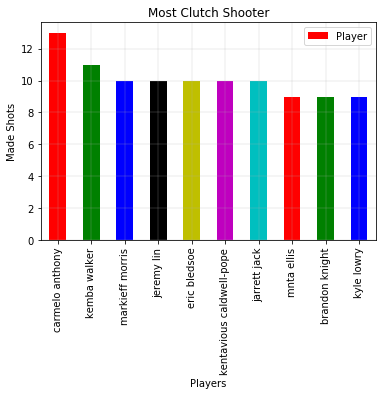

In [58]:
plt.savefig("MostClutchShooter.png")
plt.show()